<a href="https://colab.research.google.com/github/Jacobbaum19/Data-Science-Projects/blob/main/Jacob_Baum_Movies_Seaborn_and_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

Answers:

In [4]:
data.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [5]:
data.tail(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [7]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1829,279,6/14/2002,Windtalkers,"$115,000,000","$77,628,265","$40,914,068"
5262,608,10/28/2016,Inferno,"$75,000,000","$219,572,877","$34,355,263"
5260,4707,10/21/2016,Moonlight,"$1,500,000","$55,800,987","$27,854,931"
5331,2639,3/17/2017,T2: Trainspotting,"$18,000,000","$42,067,430","$2,395,410"
5213,179,7/15/2016,Ghostbusters,"$144,000,000","$229,034,050","$128,350,574"


In [8]:
data.shape

(5391, 6)

5391 rows and 6 columns

In [9]:
data.isna().values.any()

False

No NA values

In [10]:
data.duplicated().values.any()

False

No duplicated values

In [11]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

4**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
# Removing the , and $ symbol from the three categories below.
chars_to_remove = [",", "$"]

In [13]:
cols_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]

In [14]:
clean_data = data

In [15]:
# For loop that removes the characters

for col in cols_to_clean:
  for char in chars_to_remove:
    clean_data[col] = clean_data[col].astype(str).str.replace(char, "")
  # Convert to numeric type
  clean_data[col] = pd.to_numeric(data[col])

In [16]:
clean_data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1436,935,5/26/2000,Shanghai Noon,55000000,71189835,56932305
2232,2929,6/2/2004,The Return,15000000,5953886,501752
5032,1311,10/16/2015,Bridge of Spies,40000000,162610473,72313754
1393,2106,3/3/2000,The Next Best Thing,25000000,24355762,14983572
5288,1483,12/2/2016,How to be Single,37000000,99595932,46843513


In [17]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [18]:
clean_data["Release_Date"] = pd.to_datetime(clean_data["Release_Date"])

In [19]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


Now the Release Date is datetime object.

### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [20]:
# Used cols to clean instead of typing them out again...
clean_data[cols_to_clean].describe()

,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00"
mean,"31,113,737.58","88,855,421.96","41,235,519.44"
std,"40,523,796.88","168,457,757.00","66,029,346.27"
min,"1,100.00",0.00,0.00
25%,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"425,000,000.00","2,783,918,982.00","936,662,225.00"


In [21]:
# Checking the lowest budget movie.
clean_data[clean_data["USD_Production_Budget"] == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [22]:
# Recalculating question 4 since in the slides
# the 25% from above is the 25 percentile of the 3 columns and
# are NOT based on rank.

# Sort the data by 'Rank' in ascending order
data_sorted = data.sort_values('Rank', ascending=True)

# Calculate the 25th percentile rank
percentile_rank = data['Rank'].quantile(0.25)

# Filter the bottom 25% films based on the percentile rank
bottom_films = data[data['Rank'] <= percentile_rank]

# Calculate the number of profitable and loss-making films
# A film is considered profitable if the gross revenue exceeds the budget by 2.5 times (Industry benchmark)
profitable_count = len(bottom_films[bottom_films["USD_Worldwide_Gross"] > (2.5 * bottom_films["USD_Production_Budget"])])
losses = len(bottom_films) - profitable_count

print('Films with profit:', profitable_count)
print('Films with losses:', losses)

Films with profit: 591
Films with losses: 757


Answers:

All in ($)

1. $31,113,737,58
2. 88,855,421.96
3. 0
4. 591 films in the bottom 25% (based on rank) made a profit while 757 films did not.
5. 425,000,000 budget and 2,783,918,982 gross worldwide and 936,662,225 domestic revenue.

In [23]:
# Top 10 movies by rank.
data_sorted.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
4223,7,2012-09-03,John Carter,275000000,282778100,73058679
3777,8,2010-11-24,Tangled,260000000,586581936,200821936
2885,9,2007-04-05,Spider-Man 3,258000000,890875303,336530303
4789,10,2015-01-05,Avengers: Age of Ultron,250000000,1404705868,459005868


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [24]:
zero_revenue_films_domestic = clean_data[clean_data["USD_Domestic_Gross"] == 0]

print(f"Number of films that had zero domestic gross revenue (In the U.S): {len(zero_revenue_films_domestic)}")

Number of films that had zero domestic gross revenue (In the U.S): 512


In [25]:
zero_revenue_films_domestic.sort_values("USD_Production_Budget", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [26]:
zero_revenue_films_worldwide = clean_data[clean_data["USD_Worldwide_Gross"] == 0]
print(f"Number of films that had zero worldwide gross revenue: {len(zero_revenue_films_worldwide)}")

Number of films that had zero worldwide gross revenue: 357


In [27]:
zero_revenue_films_worldwide.sort_values("USD_Production_Budget", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


### Filtering on Multiple Conditions

In [28]:
international_releases = data.loc[(clean_data["USD_Domestic_Gross"] == 0) &
                                  (clean_data["USD_Worldwide_Gross"] != 0) ]
print(f"Number of international films releases: {len(international_releases)}")

Number of international films releases: 155


In [29]:
international_releases.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
2309,4623,2004-10-12,Freeze Frame,2000000,105377,0
2409,4747,2005-04-11,Wal-Mart: The High Cost of Low Price,1500000,58692,0
2578,2944,2005-12-31,Dungeons & Dragons: Wrath of the Dragon God,15000000,909822,0
2579,4531,2005-12-31,Chicken Tikka Masala,2160000,37865,0
2751,1629,2006-09-22,Bandidas,35000000,19282590,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [30]:
international_releases_2 = clean_data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross !=0")

In [31]:
international_releases_2.head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
2309,4623,2004-10-12,Freeze Frame,2000000,105377,0
2409,4747,2005-04-11,Wal-Mart: The High Cost of Low Price,1500000,58692,0
2578,2944,2005-12-31,Dungeons & Dragons: Wrath of the Dragon God,15000000,909822,0
2579,4531,2005-12-31,Chicken Tikka Masala,2160000,37865,0
2751,1629,2006-09-22,Bandidas,35000000,19282590,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [32]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [33]:
# Date of Data Collection
# Picked 12/31/2017 instead of the date in the notes because of 'The Thousand Miles'
# was not released yet.
scrape_date = pd.Timestamp('2017-12-31')

In [34]:
unreleased_movies = clean_data[clean_data["Release_Date"] >= scrape_date]

In [35]:
print(f"Number of unrealeased movies {len(unreleased_movies)}")
unreleased_movies.head(7)

Number of unrealeased movies 8


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [36]:
# Filter those out of clean data

final_clean_data = clean_data.drop(unreleased_movies.index)

In [37]:
final_clean_data.tail(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5373,2161,2017-08-25,Tulip Fever,25000000,0,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0
5375,57,2017-09-06,The Mummy,195000000,397644453,79741080
5376,4004,2017-09-06,It Comes at Night,5000000,17250101,13845101
5377,489,2017-10-02,The Lego Batman Movie,80000000,310940997,175750384
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [38]:
films_that_lost_money = final_clean_data.query("USD_Worldwide_Gross < USD_Production_Budget * 2.5")

In [39]:
percentage_of_films_that_lost_money = (films_that_lost_money.shape[0]/final_clean_data.shape[0]) * 100
print(f"Percentage of films that lost money (according to the benchmark): {percentage_of_films_that_lost_money:.2f}%")

Percentage of films that lost money (according to the benchmark): 62.49%


In [40]:
# Intresting to note that even though there's no NA values, there are 0's for films that came out before 2018...
# For some reason when the dataset was gathered it was missing these's values even though other movie
# reports showed revenue for these movies...
films_that_lost_money.sample(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2357,1982,2004-12-29,In Good Company,26000000,63489752,45489752
980,4888,1997-06-20,Dream With The Fishes,1000000,542909,542909
4785,5347,2014-12-31,Happy 40th,35000,0,0
4568,3229,2014-03-10,Drive Hard,12000000,0,0
1693,682,2001-10-08,Osmosis Jones,70000000,13596911,13596911
2342,3753,2004-12-11,Veer-Zaara,7000000,7017859,2938532
3587,3464,2010-02-19,The Good Guy,10000000,106466,100688
473,1877,1987-06-11,Cry Freedom,29000000,25899797,5899797
3985,1030,2011-09-23,Moneyball,50000000,111300835,75605492
2653,845,2006-04-21,The Sentinel,60000000,78080697,36280697


# Seaborn for Data Viz: Bubble Charts

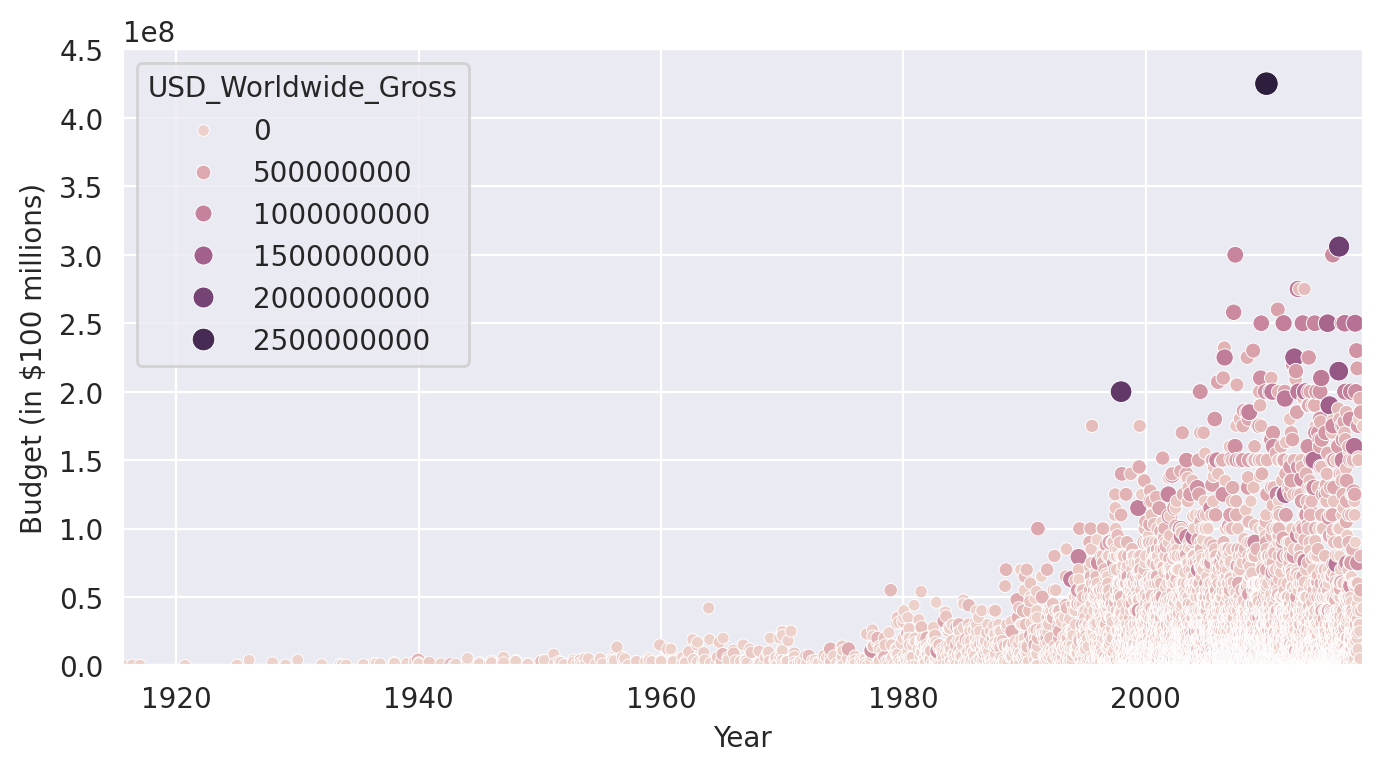

In [41]:
# Starting out with a scatter plt

# Changes chart size and clarity of the dots.
plt.figure(figsize=[8, 4], dpi=200)

# Changes the style of the chart
with sns.axes_style("darkgrid"):
  fig_1 = sns.scatterplot(data=final_clean_data,
                      x="Release_Date"	,
                      y="USD_Production_Budget",
                      hue="USD_Worldwide_Gross", # color
                      size="USD_Worldwide_Gross")

  fig_1.set(ylim=(0, 450000000),
            xlim=(final_clean_data["Release_Date"].min(),
                  final_clean_data["Release_Date"].max()),
        ylabel='Budget (in $100 millions)',
        xlabel='Year')

plt.show()

So many films past 2000! Notice how much they are overlapping that they are turning the bottom white section white.

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [42]:
dt_index = pd.DatetimeIndex(final_clean_data["Release_Date"])
year = dt_index.year

In [43]:
# Using floor division to convert the year data to the decade of the film
final_clean_data["Decade"] = (year//10) * 10

In [44]:
# Checking it
final_clean_data.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [45]:
old_films = final_clean_data[final_clean_data["Decade"] <= 1969]

In [46]:
new_films = final_clean_data[final_clean_data["Decade"] >= 1970]

In [47]:
# Number of "old" films
print(len(old_films))

153


In [48]:
# Cleopatra was the most expensive film prior to 1970.
old_films.sort_values(by="USD_Production_Budget", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
110,2552,1964-01-01,The Fall of the Roman Empire,19000000,4750000,4750000,1960
98,2546,1962-08-11,Mutiny on The Bounty,19000000,13680000,13680000,1960
114,2670,1964-10-22,My Fair Lady,17000000,72070955,72000000,1960
102,2698,1963-01-01,55 Days at Peking,17000000,10000000,10000000,1960
125,2831,1966-10-10,Hawaii,15000000,34562222,34562222,1960


# Seaborn Regression Plots

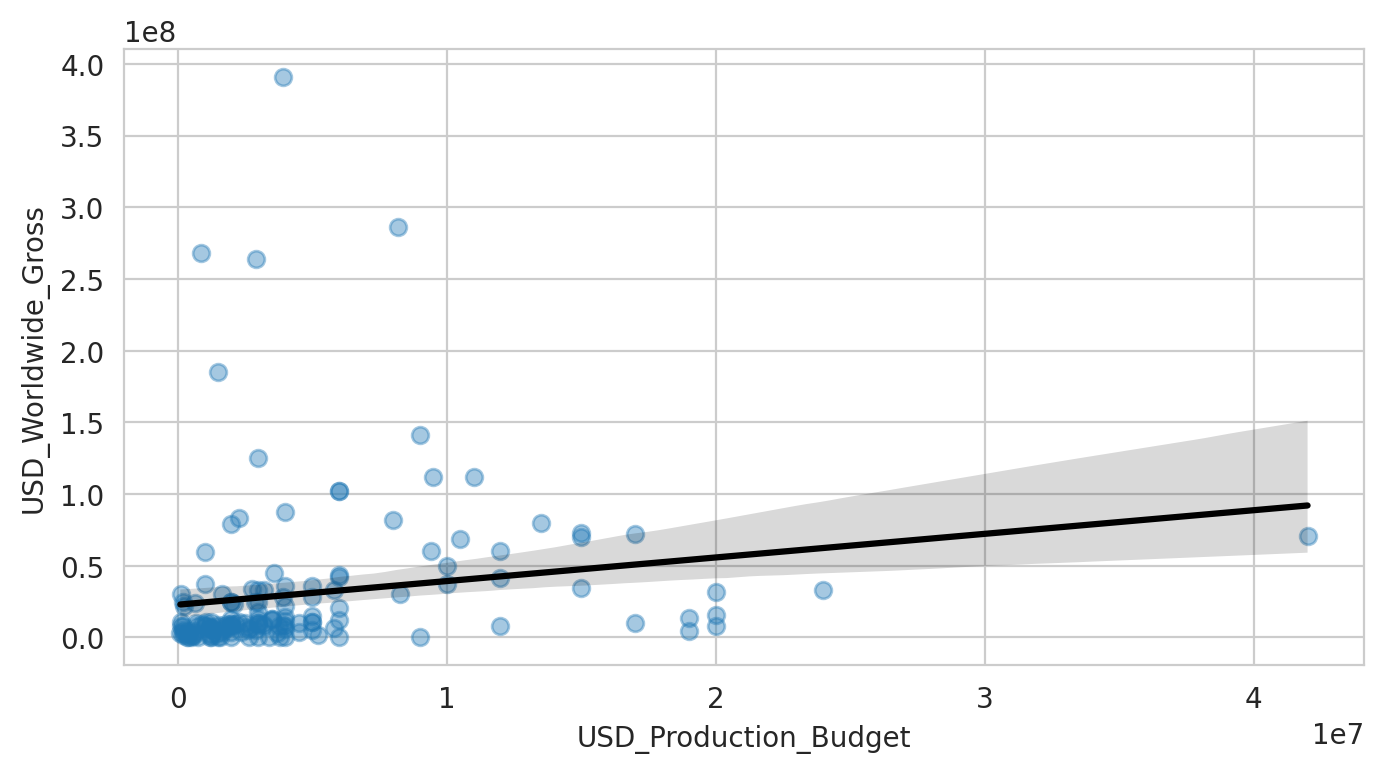

In [49]:
# For old films

plt.figure(figsize=[8, 4], dpi=200)
with sns.axes_style("whitegrid"):
    fig_2 = sns.regplot(data=old_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws={'alpha': 0.4}, # Transparency
                line_kws={'color': 'black'}) # Line color

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

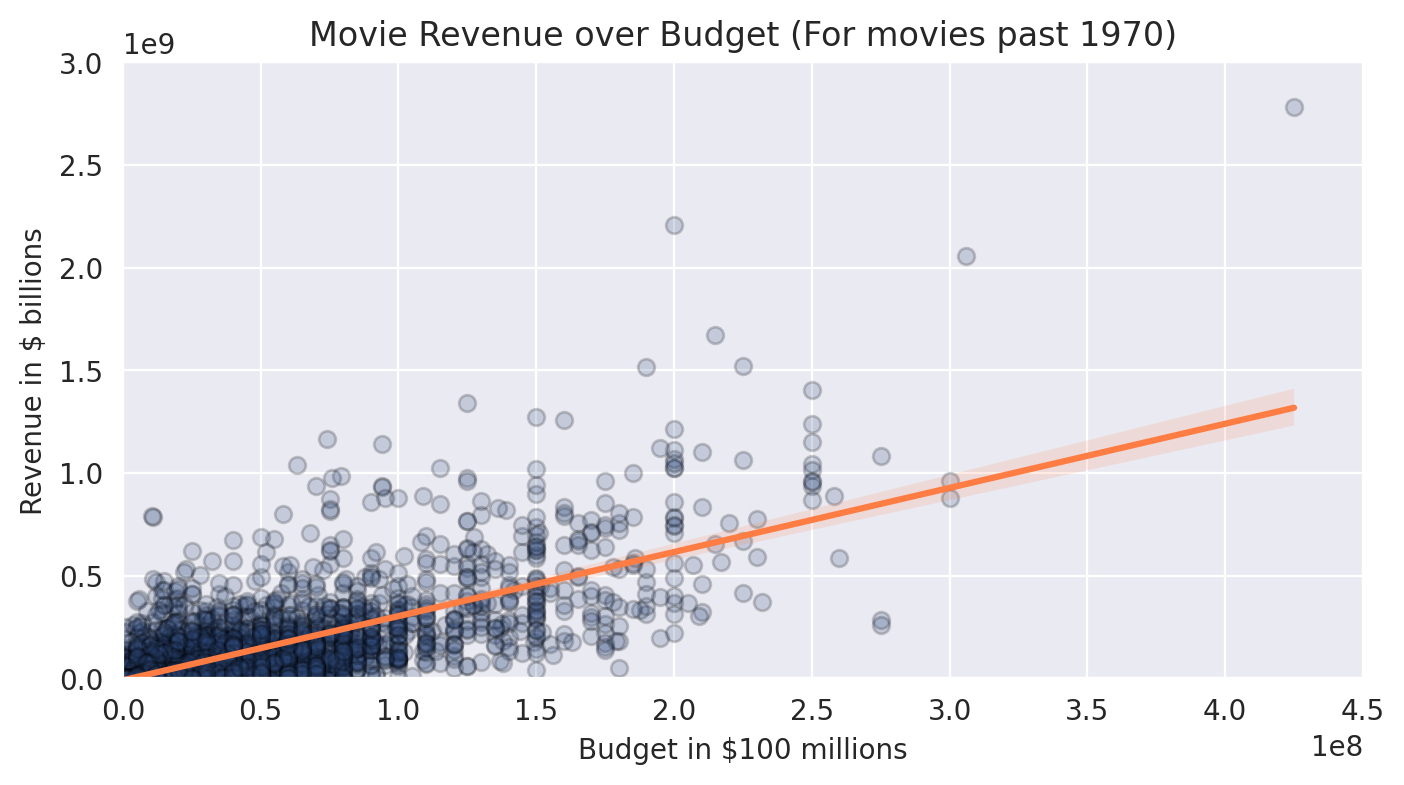

In [60]:
# For new films

plt.figure(figsize=[8, 4], dpi=200)
with sns.axes_style("darkgrid"):
    fig_3 = sns.regplot(data=new_films,
                x="USD_Production_Budget",
                y="USD_Worldwide_Gross",
                color="#2f4b7c",
                scatter_kws={"alpha": 0.2, "edgecolors": "k"}, # Transparency and edge color
                line_kws={"color": "#ff7c43"}, # Line color
                marker="o", # Marker style
                fit_reg=True) # Fit regression line

    fig_3.set(ylim=(0, 3000000000),
              xlim=(0, 450000000),
              ylabel="Revenue in $ billions",
              xlabel="Budget in $100 millions",
              title="Movie Revenue over Budget (For movies past 1970)")

1. Overall the points fit better than the old films however there is numerous more films in the new films category. Also the confidence interval is smaller.
2. A 150 million dollar film would make around $500,000,000.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [51]:
regression = LinearRegression()

In [52]:
# Explantory variables or features
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])

# Reponse Variable
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [53]:
regression.fit(X, y)

LinearRegression()

In [54]:
# Beta 0
regression.intercept_

array([22821538.63508039])

In [55]:
# Beta 1
regression.coef_

array([[1.64771314]])

In [56]:
# R Squared Value
regression.score(X, y)

0.02937258620576877

In [57]:
print(f"The intercept is: {regression.intercept_[0]}")
print(f"The slope is: {regression.coef_[0]}")
print(f"The r squared is: {regression.score(X, y)}")

The intercept is: 22821538.635080386
The slope is: [1.64771314]
The r squared is: 0.02937258620576877


### Regression Equation: y_hat (Estimated Movie Revenue ($)) = 22,821,538.63 + 1.65x

- Very low R^2 value of 3%


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [58]:
budget = 350000000

In [59]:
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*(budget)
revenue_estimate = round(revenue_estimate, -6)

In [ ]:
# Estimated movie revenue, $600,000,000 (For a movie prediction made up until 1970)
print(f"The estimated revenue for a movie with a $350 million dollar budget is: ${revenue_estimate:,.2f}")

The estimated revenue for a movie with a $350 million dollar budget is: $600,000,000.00


# Summary:



*   The data gathered from The Numbers seems to have so gaps in their data. Even without NA values present.
* The dataset countians more U.S based films than international releases.
* After the 2000s movies started ramping up their budget which was correlated with higher revenues for some films.
* Newer film revenue has a shorter confidence interval than older films (in a linear regression model.) This could imply that the old films have more prediction variables that affect revenue than newer films do.